<a href="https://colab.research.google.com/github/akimi-yano/Sports_Image_Classification/blob/main/Sports_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

open_cv_tf_project_2_image_classification_round_3_path = kagglehub.competition_download('open-cv-tf-project-2-image-classification-round-3')

print('Data source import complete.')


100%|██████████| 277M/277M [00:02<00:00, 104MB/s]

Extracting files...


Data source import complete.


In [3]:
! pip install -q kaggle

In [46]:
from google.colab import files
files.upload()

{}

In [5]:
!mkdir -p ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!ls ~/.kaggle

kaggle.json


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
! kaggle competitions download -c open-cv-tf-project-2-image-classification-round-3

 97% 268M/277M [00:02<00:00, 101MB/s]
100% 277M/277M [00:02<00:00, 115MB/s]


In [10]:
!unzip open-cv-tf-project-2-image-classification-round-3.zip -d dataset/

Streaming output truncated to the last 5000 lines.
  inflating: dataset/sports_images/all_images/594807.jpg  
  inflating: dataset/sports_images/all_images/594853.jpg  
  inflating: dataset/sports_images/all_images/594889.jpg  
  inflating: dataset/sports_images/all_images/594950.jpg  
  inflating: dataset/sports_images/all_images/594996.jpg  
  inflating: dataset/sports_images/all_images/595131.jpg  
  inflating: dataset/sports_images/all_images/595160.jpg  
  inflating: dataset/sports_images/all_images/595166.jpg  
  inflating: dataset/sports_images/all_images/595243.jpg  
  inflating: dataset/sports_images/all_images/595262.jpg  
  inflating: dataset/sports_images/all_images/595360.jpg  
  inflating: dataset/sports_images/all_images/595446.jpg  
  inflating: dataset/sports_images/all_images/595508.jpg  
  inflating: dataset/sports_images/all_images/595551.jpg  
  inflating: dataset/sports_images/all_images/595576.jpg  
  inflating: dataset/sports_images/all_images/595677.jpg  
  inf

In [11]:
import os
data_root = './dataset'
os.path.exists(data_root)
for elem in os.walk(data_root):
  print(elem)

('./dataset', ['sports_images'], ['train.csv', 'sample_submission.csv', 'test.csv'])
('./dataset/sports_images', ['all_images'], [])
('./dataset/sports_images/all_images', [], ['777144.jpg', '488234.jpg', '449665.jpg', '811472.jpg', '812314.jpg', '943670.jpg', '547328.jpg', '979910.jpg', '803983.jpg', '685561.jpg', '830438.jpg', '212685.jpg', '538929.jpg', '166123.jpg', '629791.jpg', '756177.jpg', '455151.jpg', '867285.jpg', '113603.jpg', '461681.jpg', '441941.jpg', '989468.jpg', '128434.jpg', '292065.jpg', '304614.jpg', '408008.jpg', '266491.jpg', '545464.jpg', '317943.jpg', '153175.jpg', '940963.jpg', '256978.jpg', '985477.jpg', '185158.jpg', '450853.jpg', '360703.jpg', '811412.jpg', '688928.jpg', '311303.jpg', '831947.jpg', '437643.jpg', '875185.jpg', '527203.jpg', '739449.jpg', '231356.jpg', '940360.jpg', '802539.jpg', '135613.jpg', '409200.jpg', '769744.jpg', '680382.jpg', '841132.jpg', '179615.jpg', '899874.jpg', '743056.jpg', '277827.jpg', '158862.jpg', '938855.jpg', '490657.jpg

In [12]:
import tensorflow as tf

In [13]:
import os

# If required, update the ROOT_DIR path according to the dataset path.
# ROOT_DIR = r"/kaggle/input/open-cv-tf-project-2-image-classification-round-3"
ROOT_DIR = r"./dataset"
IMG_DIR = os.path.join(ROOT_DIR, "sports_images", "all_images")

print("Contents:")
for i in os.listdir(ROOT_DIR):
    if os.path.isdir(os.path.join(ROOT_DIR, i)):
        print(f"\tDirectory: {i}")
    else:
        print(f"\tFile: {i}")

print(f"Total images: {len(os.listdir(IMG_DIR))}")

Contents:
	Directory: sports_images
	File: train.csv
	File: sample_submission.csv
	File: test.csv
Total images: 11146


In [14]:
for elem in os.walk(ROOT_DIR):
  print(elem)

('./dataset', ['sports_images'], ['train.csv', 'sample_submission.csv', 'test.csv'])
('./dataset/sports_images', ['all_images'], [])
('./dataset/sports_images/all_images', [], ['777144.jpg', '488234.jpg', '449665.jpg', '811472.jpg', '812314.jpg', '943670.jpg', '547328.jpg', '979910.jpg', '803983.jpg', '685561.jpg', '830438.jpg', '212685.jpg', '538929.jpg', '166123.jpg', '629791.jpg', '756177.jpg', '455151.jpg', '867285.jpg', '113603.jpg', '461681.jpg', '441941.jpg', '989468.jpg', '128434.jpg', '292065.jpg', '304614.jpg', '408008.jpg', '266491.jpg', '545464.jpg', '317943.jpg', '153175.jpg', '940963.jpg', '256978.jpg', '985477.jpg', '185158.jpg', '450853.jpg', '360703.jpg', '811412.jpg', '688928.jpg', '311303.jpg', '831947.jpg', '437643.jpg', '875185.jpg', '527203.jpg', '739449.jpg', '231356.jpg', '940360.jpg', '802539.jpg', '135613.jpg', '409200.jpg', '769744.jpg', '680382.jpg', '841132.jpg', '179615.jpg', '899874.jpg', '743056.jpg', '277827.jpg', '158862.jpg', '938855.jpg', '490657.jpg

## <font style="color:red">Data Preparation</font>


In [15]:
import pandas as pd
image_dir = './dataset/sports_images/all_images/'

train_file = './dataset/train.csv'
train_raw_df = pd.read_csv(train_file)

test_file = './dataset/test.csv'
test_raw_df = pd.read_csv(test_file)

train_image_paths = train_raw_df['ID'].apply(lambda x: image_dir + x).tolist()  # Combining the image directory and ID for train df
train_labels = train_raw_df['CLASS'].tolist()  # If labels are present

test_image_paths = test_raw_df['ID'].apply(lambda x: image_dir + x).tolist()  # Combining the image directory and ID for test df

In [16]:
train_df = pd.DataFrame({
    'Filepath': train_image_paths,
    'Label': train_labels
})

In [17]:
train_df.head()

,Filepath,Label
0,./dataset/sports_images/all_images/711094.jpg,motorcycle_racing
1,./dataset/sports_images/all_images/422683.jpg,figure_skating_women
2,./dataset/sports_images/all_images/255111.jpg,lacrosse
3,./dataset/sports_images/all_images/134045.jpg,volleyball
4,./dataset/sports_images/all_images/861603.jpg,bmx


In [18]:
test_df = pd.DataFrame({
    'Filepath': test_image_paths
})

In [19]:
test_df

,Filepath
0,./dataset/sports_images/all_images/687731.jpg
1,./dataset/sports_images/all_images/158862.jpg
2,./dataset/sports_images/all_images/660887.jpg
3,./dataset/sports_images/all_images/620977.jpg
4,./dataset/sports_images/all_images/522311.jpg
...,...
1110,./dataset/sports_images/all_images/854092.jpg
1111,./dataset/sports_images/all_images/398067.jpg
1112,./dataset/sports_images/all_images/973078.jpg
1113,./dataset/sports_images/all_images/745691.jpg


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

In [21]:
#  Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    # y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode=None,
    batch_size=32,
    shuffle=False
)

Found 8025 validated image filenames belonging to 73 classes.
Found 2006 validated image filenames belonging to 73 classes.
Found 1115 validated image filenames.


## Configuration



In [22]:
from dataclasses import dataclass

@dataclass
class TrainingConfig:
    BATCH_SIZE: int = 32
    EPOCHS: int = 100
    LEARNING_RATE: float = 0.0001
    use_multiprocessing: bool = True
    num_workers: int = 4
    weight_decay: float = 0.0001  # Regularization for the optimizer :)
    optimizer: str = "adam"
    seed: int = 42

In [23]:
@dataclass
class DatasetConfig:
    DATA_ROOT: str = "./dataset/sports_images/all_images"
    DATA_SHAPE: tuple = (224, 224, 3)
    NUM_CLASSES: int = 73
    VALIDATION_SPLIT: float = 0.2
    augmentations: bool = True  # Whether to apply data augmentation
    shuffle: bool = True        # Whether to shuffle the data

## Model


In [24]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    GlobalAveragePooling2D,
    Rescaling
)
from tensorflow.keras.applications import EfficientNetB0

In [25]:
# Resize Layer
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(224,224),
  tf.keras.layers.Rescaling(1./255),
])

# Setup data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
], name="data_augmentation")

In [26]:
def create_model(num_classes=DatasetConfig.NUM_CLASSES, input_shape=DatasetConfig.DATA_SHAPE, name="Experiment_Model"):

    # inputs = Input(shape=input_shape, name="input_layer")

    # pretrained on ImageNet
    pretrained_model = EfficientNetB0(
        input_shape=(224, 224, 3),
        include_top=False,  # exclude the final classification head
        # input_tensor=inputs,
        weights="imagenet",  # use pretrained weights !
    )

    # Freezing the backbone layers for transfer learning
    pretrained_model.trainable = False


    inputs = pretrained_model.input
    x = resize_and_rescale(inputs)
    x = data_augmentation(x)

    x = GlobalAveragePooling2D(name="global_avg_pooling")(pretrained_model.output)
    x = Dropout(0.5, name="dropout")(x)
    outputs = Dense(num_classes, activation="softmax", name="output_layer")(x)

    model = Model(inputs=inputs, outputs=outputs, name=name)

    return model

In [27]:
model = create_model(DatasetConfig.NUM_CLASSES, DatasetConfig.DATA_SHAPE)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
from tensorflow.keras.callbacks import TensorBoard

# Directory to save TensorBoard logs
log_dir = os.path.join("logs", "fit")

# Initialize TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [29]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=2)

In [30]:
model.compile(
    optimizer=TrainingConfig.optimizer,
    loss='categorical_crossentropy',
    metrics=["accuracy"],
)

In [31]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=TrainingConfig.EPOCHS,
    callbacks=[tensorboard_callback, early_stopping],
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 61s 153ms/step - accuracy: 0.3676 - loss: 2.8872 - val_accuracy: 0.8624 - val_loss: 0.7572
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.8542 - loss: 0.7292 - val_accuracy: 0.8993 - val_loss: 0.4743
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.9037 - loss: 0.4641 - val_accuracy: 0.9158 - val_loss: 0.3700
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.9292 - loss: 0.3393 - val_accuracy: 0.9237 - val_loss: 0.3192
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.9386 - loss: 0.2836 - val_accuracy: 0.9267 - val_loss: 0.2934
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.9484 - loss: 0.2355 - val_accuracy: 0.9307 - val_loss: 0.2757
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.9579 - loss: 0.1989 - val_accuracy: 0.9302 - val_loss: 0.2591
Epoch 8/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.9588 - loss: 0.1931 - val

In [32]:
model.summary()

Model: "Experiment_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling_1[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_2[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,330,112 (16.52 MB)

 Trainable params: 93,513 (365.29 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 187,028 (730.58 KB)

In [33]:
history.history

{'accuracy': [0.5885358452796936,
  0.8616822361946106,
  0.9006853699684143,
  0.9226168394088745,
  0.93732088804245,
  0.9452959299087524,
  0.9520249366760254,
  0.958629310131073,
  0.9588785171508789,
  0.9666043519973755,
  0.9692211747169495,
  0.970841109752655,
  0.9703426957130432,
  0.9753270745277405,
  0.9781931638717651,
  0.9776946902275085,
  0.9776946902275085,
  0.9785670042037964,
  0.9759501814842224,
  0.9809345602989197,
  0.9796884655952454,
  0.9795638918876648,
  0.9814330339431763,
  0.9844236969947815,
  0.9820560812950134,
  0.9842990636825562,
  0.9831775426864624,
  0.9859189987182617,
  0.9838006496429443,
  0.9841744303703308],
 'loss': [1.9460667371749878,
  0.6618548631668091,
  0.45729032158851624,
  0.3484329879283905,
  0.2854211628437042,
  0.24482308328151703,
  0.2107950747013092,
  0.18884599208831787,
  0.17489533126354218,
  0.14878436923027039,
  0.14003615081310272,
  0.13034628331661224,
  0.12315031886100769,
  0.11613602191209793,
  0.10

In [34]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()


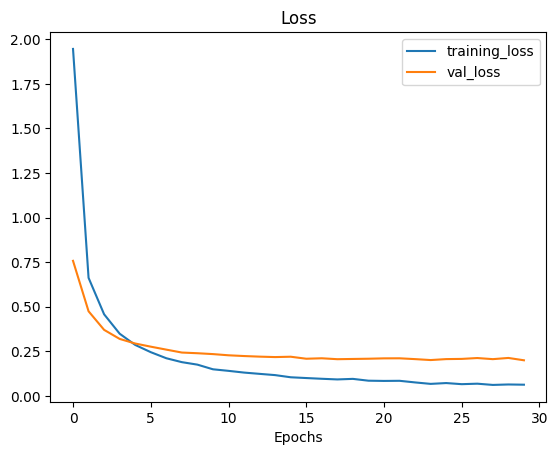

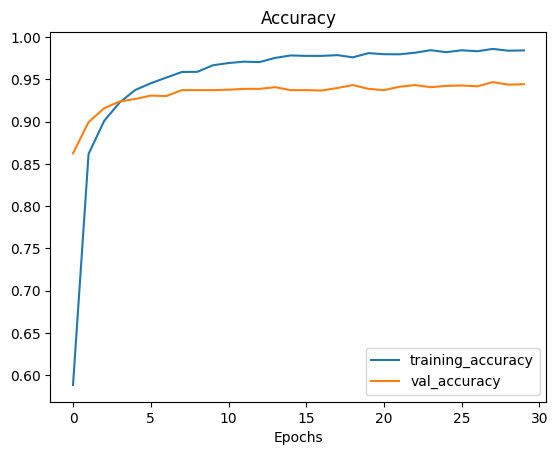

In [36]:
plot_loss_curves(history)

In [37]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 297ms/step
The first 5 predictions: ['uneven_bars', 'volleyball', 'figure_skating_women', 'polo', 'lacrosse']


In [38]:
pred

['uneven_bars',
 'volleyball',
 'figure_skating_women',
 'polo',
 'lacrosse',
 'olympic_wrestling',
 'high_jump',
 'bmx',
 'bmx',
 'rings',
 'parallel_bar',
 'ampute_football',
 'balance_beam',
 'weightlifting',
 'bobsled',
 'cricket',
 'golf',
 'bmx',
 'rugby',
 'volleyball',
 'horse_racing',
 'horse_jumping',
 'weightlifting',
 'wheelchair_racing',
 'nascar_racing',
 'frisbee',
 'sumo_wrestling',
 'bobsled',
 'judo',
 'cricket',
 'balance_beam',
 'sailboat_racing',
 'olympic_wrestling',
 'table_tennis',
 'javelin',
 'lacrosse',
 'javelin',
 'surfing',
 'figure_skating_pairs',
 'surfing',
 'bowling',
 'figure_skating_women',
 'rugby',
 'water_polo',
 'rock_climbing',
 'rowing',
 'table_tennis',
 'giant_slalom',
 'field_hockey',
 'polo',
 'balance_beam',
 'formula_1_racing',
 'table_tennis',
 'bull_riding',
 'judo',
 'figure_skating_pairs',
 'formula_1_racing',
 'football',
 'frisbee',
 'judo',
 'cricket',
 'frisbee',
 'uneven_bars',
 'rings',
 'boxing',
 'jai_alai',
 'surfing',
 'jai_

In [39]:
test_raw_df

,ID
0,687731.jpg
1,158862.jpg
2,660887.jpg
3,620977.jpg
4,522311.jpg
...,...
1110,854092.jpg
1111,398067.jpg
1112,973078.jpg
1113,745691.jpg


In [40]:
submission_csv = "./dataset/submission.csv"

In [41]:
img_ids = test_raw_df["ID"].values
img_ids

array(['687731.jpg', '158862.jpg', '660887.jpg', ..., '973078.jpg',
       '745691.jpg', '494433.jpg'], dtype=object)

In [42]:
submission_df = pd.DataFrame({
    "ID": img_ids,
    "CLASS": pred
})

In [43]:
submission_df

,ID,CLASS
0,687731.jpg,uneven_bars
1,158862.jpg,volleyball
2,660887.jpg,figure_skating_women
3,620977.jpg,polo
4,522311.jpg,lacrosse
...,...,...
1110,854092.jpg,boxing
1111,398067.jpg,figure_skating_men
1112,973078.jpg,parallel_bar
1113,745691.jpg,nascar_racing


In [44]:
submission_df['CLASS'].value_counts()

,count
CLASS,
baseball,22
frisbee,21
rings,21
rugby,20
basketball,20
...,...
parallel_bar,12
boxing,11
wheelchair_basketball,11


In [45]:
submission_df.to_csv(submission_csv, index=False)

print(f"Submission file saved to: {submission_csv}")

Submission file saved to: ./dataset/submission.csv
